In [1]:
# 查找指定 crop 下是否包含某些类别的标签
import os
import zarr
import numpy as np

GROUNDTRUTH_ROOT = r"../data/jrc_cos7-1a/jrc_cos7-1a.zarr/recon-1/labels/groundtruth"

# 你关心的类别
SELECT_CLASSES = {
    "cyto": 1,
    "mito_mem": 2,
    "mito_lum": 3,
    "er_mem": 4,
    "er_lum": 5,
}

def crop_has_label(crop_path, label_name):
    """
    判断某个 crop 是否包含某个 label。
    并检查是否真的有非零像素。
    """
    label_path = os.path.join(crop_path, label_name, "s0")
    if not os.path.exists(label_path):
        return False, 0  # 目录不存在

    try:
        arr = zarr.open(label_path, mode="r")
        data = arr[:]
        nonzero = np.count_nonzero(data)
        return True, nonzero
    except Exception as e:
        print(f"  ⚠️ 读取失败 {label_path}: {e}")
        return False, 0


def main():
    print(f"Scanning crops in: {GROUNDTRUTH_ROOT}\n")

    crop_list = sorted([d for d in os.listdir(GROUNDTRUTH_ROOT)
                        if d.startswith("crop")])

    results = {}

    for crop in crop_list:
        crop_path = os.path.join(GROUNDTRUTH_ROOT, crop)
        print(f"=== Checking {crop} ===")

        crop_info = {}

        for label_name in SELECT_CLASSES.keys():
            exists, nonzero = crop_has_label(crop_path, label_name)
            crop_info[label_name] = (exists, nonzero)

            if exists:
                if nonzero > 0:
                    print(f"  ✔ {label_name:8s} : exists, nonzero voxels = {nonzero}")
                else:
                    print(f"  ❗ {label_name:8s} : exists BUT all zeros")
            else:
                print(f"  ✖ {label_name:8s} : NOT found")

        print("")
        results[crop] = crop_info

    print("\n======= SUMMARY =======\n")
    for crop, info in results.items():
        print(f"{crop}:")
        for cname, (exists, nonzero) in info.items():
            status = ("OK" if exists and nonzero > 0
                      else "EMPTY" if exists and nonzero == 0
                      else "NONE")
            print(f"  {cname:8s} → {status}")
        print("")


if __name__ == "__main__":
    main()


Scanning 12 crops for atomic classes 20–29...



  8%|▊         | 1/12 [00:01<00:17,  1.55s/it]


Crop: crop234
✔ Present (20–29):
   NONE

✘ Absent (20–29):
    20:ne_mem
    21:ne_lum
    22:np_out
    23:np_in
    24:hchrom
    25:nhchrom
    26:echrom
    27:nechrom
    28:nucpl
    29:nucleo

--------------------------------


 17%|█▋        | 2/12 [00:02<00:14,  1.42s/it]


Crop: crop236
✔ Present (20–29):
   NONE

✘ Absent (20–29):
    20:ne_mem
    21:ne_lum
    22:np_out
    23:np_in
    24:hchrom
    25:nhchrom
    26:echrom
    27:nechrom
    28:nucpl
    29:nucleo

--------------------------------


 25%|██▌       | 3/12 [00:04<00:12,  1.37s/it]


Crop: crop237
✔ Present (20–29):
   NONE

✘ Absent (20–29):
    20:ne_mem
    21:ne_lum
    22:np_out
    23:np_in
    24:hchrom
    25:nhchrom
    26:echrom
    27:nechrom
    28:nucpl
    29:nucleo

--------------------------------


 33%|███▎      | 4/12 [00:05<00:09,  1.18s/it]


Crop: crop239
✔ Present (20–29):
   NONE

✘ Absent (20–29):
    20:ne_mem
    21:ne_lum
    22:np_out
    23:np_in
    24:hchrom
    25:nhchrom
    26:echrom
    27:nechrom
    28:nucpl
    29:nucleo

--------------------------------


 42%|████▏     | 5/12 [00:06<00:08,  1.18s/it]


Crop: crop243
✔ Present (20–29):
   NONE

✘ Absent (20–29):
    20:ne_mem
    21:ne_lum
    22:np_out
    23:np_in
    24:hchrom
    25:nhchrom
    26:echrom
    27:nechrom
    28:nucpl
    29:nucleo

--------------------------------


 50%|█████     | 6/12 [01:20<02:35, 25.95s/it]


Crop: crop247
✔ Present (20–29):
   NONE

✘ Absent (20–29):
    20:ne_mem
    21:ne_lum
    22:np_out
    23:np_in
    24:hchrom
    25:nhchrom
    26:echrom
    27:nechrom
    28:nucpl
    29:nucleo

--------------------------------


 58%|█████▊    | 7/12 [01:21<01:29, 17.84s/it]


Crop: crop248
✔ Present (20–29):
   NONE

✘ Absent (20–29):
    20:ne_mem
    21:ne_lum
    22:np_out
    23:np_in
    24:hchrom
    25:nhchrom
    26:echrom
    27:nechrom
    28:nucpl
    29:nucleo

--------------------------------


 67%|██████▋   | 8/12 [01:22<00:50, 12.56s/it]


Crop: crop252
✔ Present (20–29):
   NONE

✘ Absent (20–29):
    20:ne_mem
    21:ne_lum
    22:np_out
    23:np_in
    24:hchrom
    25:nhchrom
    26:echrom
    27:nechrom
    28:nucpl
    29:nucleo

--------------------------------


 75%|███████▌  | 9/12 [01:23<00:27,  9.04s/it]


Crop: crop254
✔ Present (20–29):
   NONE

✘ Absent (20–29):
    20:ne_mem
    21:ne_lum
    22:np_out
    23:np_in
    24:hchrom
    25:nhchrom
    26:echrom
    27:nechrom
    28:nucpl
    29:nucleo

--------------------------------


 83%|████████▎ | 10/12 [01:25<00:13,  6.63s/it]


Crop: crop256
✔ Present (20–29):
   NONE

✘ Absent (20–29):
    20:ne_mem
    21:ne_lum
    22:np_out
    23:np_in
    24:hchrom
    25:nhchrom
    26:echrom
    27:nechrom
    28:nucpl
    29:nucleo

--------------------------------


 92%|█████████▏| 11/12 [01:26<00:04,  4.99s/it]


Crop: crop257
✔ Present (20–29):
   NONE

✘ Absent (20–29):
    20:ne_mem
    21:ne_lum
    22:np_out
    23:np_in
    24:hchrom
    25:nhchrom
    26:echrom
    27:nechrom
    28:nucpl
    29:nucleo

--------------------------------


100%|██████████| 12/12 [01:35<00:00,  7.97s/it]


Crop: crop292
✔ Present (20–29):
    20:ne_mem
    21:ne_lum
    22:np_out
    23:np_in
    24:hchrom
    28:nucpl

✘ Absent (20–29):
    25:nhchrom
    26:echrom
    27:nechrom
    29:nucleo

--------------------------------


In [ ]:
import os
import zarr
import numpy as np

GROUNDTRUTH_ROOT = r"../data/jrc_cos7-1a/jrc_cos7-1a.zarr/recon-1/labels/groundtruth"
CROP_IDS = ["crop234", "crop236", "crop237", "crop239", "crop292"]


def has_label(crop_path, label_name):
    """检测某个 label 是否存在且包含非零体素"""
    p = os.path.join(crop_path, label_name, "s0")
    if not os.path.exists(p):
        return False
    try:
        arr = zarr.open(p, mode="r")
        return np.count_nonzero(arr[:]) > 0
    except:
        return False


def list_valid_classes(crop):
    """列出 crop 中的所有有效类"""
    crop_path = os.path.join(GROUNDTRUTH_ROOT, crop)
    classes = []
    for name in os.listdir(crop_path):
        if os.path.isdir(os.path.join(crop_path, name)):
            if has_label(crop_path, name):
                classes.append(name)
    return set(classes)


def main():
    crop_sets = []
    for crop in CROP_IDS:
        valid = list_valid_classes(crop)
        print(f"{crop}: {len(valid)} classes found")
        crop_sets.append(valid)

    # 求 5 个 crop 的交集
    common = set.intersection(*crop_sets)

    print("\n==================== COMMON CLASSES ====================")
    print(f"共有 {len(common)} 个类同时出现在这 5 个 crop 中：\n")
    print(sorted(common))

    # 如果你只想要“3–5 个共同类”，我们取前 3~5 个
    common_list = sorted(common)

    print("\n推荐的 3–5 个共同类：")
    print(common_list[:5])


if __name__ == "__main__":
    main()


In [2]:
from upath import UPath

### 获取文件夹下内容
iterdir() 用来 列出某个目录（文件夹）下的所有直接子项（文件和子目录）。

不会递归进入更深层的目录。

返回的是一个生成器（iterator），每个元素是一个 Path / UPath 对象，而不是字符串。

In [3]:
ROOT = UPath("/Volumes/mac/cellmap_data")
for dataset in ROOT.iterdir():
    print(dataset)

/Volumes/mac/cellmap_data/jrc_hela-3
/Volumes/mac/cellmap_data/jrc_sum159-4
/Volumes/mac/cellmap_data/jrc_hela-2
/Volumes/mac/cellmap_data/jrc_cos7-1a
/Volumes/mac/cellmap_data/jrc_zf-cardiac-1
/Volumes/mac/cellmap_data/jrc_mus-kidney-glomerulus-2
/Volumes/mac/cellmap_data/jrc_fly-mb-1a
/Volumes/mac/cellmap_data/jrc_mus-kidney
/Volumes/mac/cellmap_data/jrc_mus-liver
/Volumes/mac/cellmap_data/jrc_mus-liver-zon-1
/Volumes/mac/cellmap_data/jrc_sum159-1
/Volumes/mac/cellmap_data/jrc_ut21-1413-003
/Volumes/mac/cellmap_data/jrc_cos7-1b
/Volumes/mac/cellmap_data/jrc_jurkat-1
/Volumes/mac/cellmap_data/jrc_macrophage-2
/Volumes/mac/cellmap_data/jrc_mus-liver-3
/Volumes/mac/cellmap_data/jrc_ctl-id8-1
/Volumes/mac/cellmap_data/jrc_mus-nacc-1
/Volumes/mac/cellmap_data/jrc_fly-vnc-1
/Volumes/mac/cellmap_data/jrc_mus-kidney-3
/Volumes/mac/cellmap_data/jrc_mus-heart-1
/Volumes/mac/cellmap_data/jrc_mus-liver-zon-2


In [4]:
for dataset in ROOT.iterdir():
    print(dataset.name)

jrc_hela-3
jrc_sum159-4
jrc_hela-2
jrc_cos7-1a
jrc_zf-cardiac-1
jrc_mus-kidney-glomerulus-2
jrc_fly-mb-1a
jrc_mus-kidney
jrc_mus-liver
jrc_mus-liver-zon-1
jrc_sum159-1
jrc_ut21-1413-003
jrc_cos7-1b
jrc_jurkat-1
jrc_macrophage-2
jrc_mus-liver-3
jrc_ctl-id8-1
jrc_mus-nacc-1
jrc_fly-vnc-1
jrc_mus-kidney-3
jrc_mus-heart-1
jrc_mus-liver-zon-2


### 判断当前路径是否是一个 目录（文件夹）。

In [5]:
print(ROOT.is_dir())

True


### path.name.startwith()
.name  
 
这是 Path / UPath 对象的一个属性，用来获取文件或文件夹的名字（不含路径）。  

.startswith()

这是 字符串（str） 的方法，用来判断字符串是否以某个前缀开头。

In [6]:
for dataset in ROOT.iterdir():
    gt_root = dataset / f"{dataset.name}.zarr" / "recon-1" /"labels"/ "groundtruth"
    for crop in gt_root.iterdir():
        print(crop.name)
        print(crop.name.startswith("crop"), '\n')

crop62
True 

crop65
True 

crop64
True 

crop63
True 

crop85
True 

.zgroup
False 

crop100
True 

crop101
True 

crop111
True 

crop181
True 

crop50
True 

crop61
True 

crop60
True 

crop51
True 

crop33
True 

crop34
True 

crop27
True 

crop87
True 

crop86
True 

crop102
True 

crop209
True 

crop208
True 

crop206
True 

crop201
True 

crop212
True 

crop213
True 

.zgroup
False 

crop189
True 

crop187
True 

crop186
True 

crop188
True 

crop203
True 

crop202
True 

crop218
True 

crop216
True 

crop211
True 

crop210
True 

crop217
True 

crop219
True 

crop113
True 

crop54
True 

crop96
True 

crop55
True 

crop15
True 

crop23
True 

.zgroup
False 

crop14
True 

crop13
True 

crop7
True 

crop9
True 

crop8
True 

crop6
True 

crop1
True 

crop155
True 

crop57
True 

crop59
True 

crop95
True 

crop94
True 

crop58
True 

crop56
True 

crop16
True 

crop18
True 

crop19
True 

crop28
True 

crop4
True 

crop3
True 

crop254
True 

crop236
True 

crop252
True 

crop237

In [7]:
import pandas as pd

# 根目录（请改成你的实际路径）
ROOT = UPath("/Volumes/mac/cellmap_data")

# 用字典存储： {dataset_name: [crop1, crop2, ...]}
data = {}
# 列表用来之后存储二级索引的classes数据
records = []

# 进入cellmap_data文件夹下, 先获取dataset的名字, 然后在这个循环里推进到获取完所有crop的名字
for dataset in ROOT.iterdir():
    gt_root = dataset / f"{dataset.name}.zarr" / "recon-1" /"labels"/ "groundtruth"
    if not gt_root.exists():
        continue

    crop_names = []
    # 进入groundtruth文件夹下
    for crop in sorted(gt_root.iterdir()):
        if crop.is_dir() and crop.name.startswith("crop"):
            crop_names.append(crop.name) # 依次按排序存储groundtruth文件夹下的每一个crop的名字
            classes = [cls.name for cls in crop.iterdir() if cls.is_dir()] # 访问每个crop下的所有classes, 放进字典里
            records.append({
                "dataset": dataset.name,
                "crop": crop.name,
                "classes": classes
            })

    if crop_names:
        data[dataset.name] = crop_names
        print(f" Dataset: {dataset.name} ({len(crop_names)} crops)")
        for crop in crop_names:
            print(f"   └─  {crop}")

print(records)
# 创建二级索引dataframe
df = pd.DataFrame(records).set_index(["dataset", "crop"])

 Dataset: jrc_hela-3 (19 crops)
   └─  crop100
   └─  crop101
   └─  crop102
   └─  crop111
   └─  crop181
   └─  crop27
   └─  crop33
   └─  crop34
   └─  crop50
   └─  crop51
   └─  crop60
   └─  crop61
   └─  crop62
   └─  crop63
   └─  crop64
   └─  crop65
   └─  crop85
   └─  crop86
   └─  crop87
 Dataset: jrc_sum159-4 (18 crops)
   └─  crop186
   └─  crop187
   └─  crop188
   └─  crop189
   └─  crop201
   └─  crop202
   └─  crop203
   └─  crop206
   └─  crop208
   └─  crop209
   └─  crop210
   └─  crop211
   └─  crop212
   └─  crop213
   └─  crop216
   └─  crop217
   └─  crop218
   └─  crop219
 Dataset: jrc_hela-2 (26 crops)
   └─  crop1
   └─  crop113
   └─  crop13
   └─  crop14
   └─  crop15
   └─  crop155
   └─  crop16
   └─  crop18
   └─  crop19
   └─  crop23
   └─  crop28
   └─  crop3
   └─  crop4
   └─  crop54
   └─  crop55
   └─  crop56
   └─  crop57
   └─  crop58
   └─  crop59
   └─  crop6
   └─  crop7
   └─  crop8
   └─  crop9
   └─  crop94
   └─  crop95
   └─  crop96
 D

In [8]:
df

classes
dataset             crop                                                      
jrc_hela-3          crop100  [mito_mem, lyso, perox, isg_ins, mito_lum, mt,...
                    crop101  [mito_mem, cyto, pm, lyso, ves, er_mem_all, pe...
                    crop102  [lyso, perox, isg_ins, mt, isg, eres_mem, eres...
                    crop111  [mito_mem, cyto, pm, lyso, ves, er_mem_all, pe...
                    crop181  [mito_mem, cyto, pm, lyso, ves, er_mem_all, pe...
...                                                                        ...
jrc_mus-liver-zon-2 crop369  [mito_mem, cyto, pm, lyso, vim, ves, er_mem_al...
                    crop370  [mito_mem, cyto, pm, lyso, vim, ves, er_mem_al...
                    crop376  [mito_mem, cyto, pm, lyso, vim, ves, er_mem_al...
                    crop387  [vim, perox, isg_ins, isg, eres_mem, eres, ere...
                    crop408  [vim, perox, isg_ins, isg, bm, ribo, tbar, all...

[289 rows x 1 columns]

In [9]:
df.loc[("jrc_hela-3", "crop100"), "classes"]

['mito_mem',
 'lyso',
 'perox',
 'isg_ins',
 'mito_lum',
 'mt',
 'isg',
 'eres_mem',
 'eres',
 'eres_lum',
 'bm',
 'ld',
 'tbar',
 'ld_mem',
 'cent_all',
 'np_out',
 'ld_lum',
 'lyso_lum',
 'all',
 'ne_mem_all',
 'nucpl',
 'isg_mem',
 'np_in',
 'nuc',
 'mt_in',
 'glyco',
 'isg_lum',
 'lyso_mem',
 'mito_ribo',
 'ne_mem',
 'perox_lum',
 'perox_mem',
 'ne_lum',
 'mt_out',
 'chrom',
 'ne',
 'np',
 'hchrom',
 'nucleo',
 'nhchrom',
 'cent_sdapp',
 'rbc',
 'cent_dapp',
 'mito',
 'nechrom',
 'echrom']

# 二级索引数据可视化

In [10]:
import matplotlib.pyplot as plt

In [11]:
df["classes"]

dataset              crop   
jrc_hela-3           crop100    [mito_mem, lyso, perox, isg_ins, mito_lum, mt,...
                     crop101    [mito_mem, cyto, pm, lyso, ves, er_mem_all, pe...
                     crop102    [lyso, perox, isg_ins, mt, isg, eres_mem, eres...
                     crop111    [mito_mem, cyto, pm, lyso, ves, er_mem_all, pe...
                     crop181    [mito_mem, cyto, pm, lyso, ves, er_mem_all, pe...
                                                      ...                        
jrc_mus-liver-zon-2  crop369    [mito_mem, cyto, pm, lyso, vim, ves, er_mem_al...
                     crop370    [mito_mem, cyto, pm, lyso, vim, ves, er_mem_al...
                     crop376    [mito_mem, cyto, pm, lyso, vim, ves, er_mem_al...
                     crop387    [vim, perox, isg_ins, isg, eres_mem, eres, ere...
                     crop408    [vim, perox, isg_ins, isg, bm, ribo, tbar, all...
Name: classes, Length: 289, dtype: object

In [12]:
df["classes"].explode()

dataset              crop   
jrc_hela-3           crop100    mito_mem
                     crop100        lyso
                     crop100       perox
                     crop100     isg_ins
                     crop100    mito_lum
                                  ...   
jrc_mus-liver-zon-2  crop408         all
                     crop408     isg_mem
                     crop408     isg_lum
                     crop408       actin
                     crop408         rbc
Name: classes, Length: 16644, dtype: object

In [13]:
long = df["classes"].explode().rename("class").reset_index()
long

,dataset,crop,class
0,jrc_hela-3,crop100,mito_mem
1,jrc_hela-3,crop100,lyso
2,jrc_hela-3,crop100,perox
3,jrc_hela-3,crop100,isg_ins
4,jrc_hela-3,crop100,mito_lum
...,...,...,...
16639,jrc_mus-liver-zon-2,crop408,all
16640,jrc_mus-liver-zon-2,crop408,isg_mem
16641,jrc_mus-liver-zon-2,crop408,isg_lum
16642,jrc_mus-liver-zon-2,crop408,actin


class
isg_ins      289
isg          289
all          289
isg_mem      289
isg_lum      289
            ... 
vac_lum       11
chlor_mem     11
chlor_sg      11
chlor         11
vac           11
Name: count, Length: 75, dtype: int64


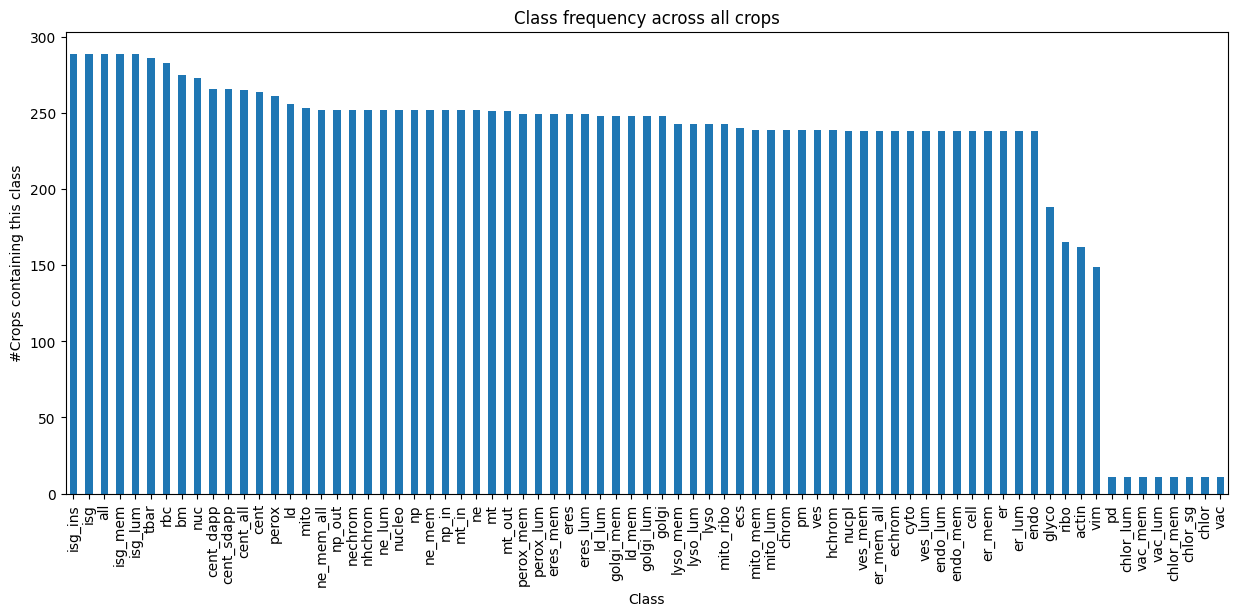

In [14]:
# ② 全局计数
class_counts = long["class"].value_counts().sort_values(ascending=False) # 按 class 分组计数，统计每个类出现了多少次（出现一次=出现在一个 crop 中一次）
# .sort_values(ascending=False)：按频次从高到低排序，方便画 Top 类别。
print(class_counts)

# ③ 柱状图（全局）
plt.figure(figsize=(15, 6)) # 自定义图大小,plt.tight_layout() # 自动调整边距，避免 x 轴类名被遮挡 这个方法不太管用
ax = class_counts.plot(kind="bar") # kind="bar" 画柱状图：x 轴是类名（Series 的索引），y 轴是计数。
ax.set_xlabel("Class")
ax.set_ylabel("#Crops containing this class")
ax.set_title("Class frequency across all crops")
plt.show()

Index(['isg_ins', 'isg', 'all', 'isg_mem', 'isg_lum', 'tbar', 'rbc', 'bm',
       'nuc', 'cent_dapp', 'cent_sdapp', 'cent_all', 'cent', 'perox', 'ld'],
      dtype='object', name='class')


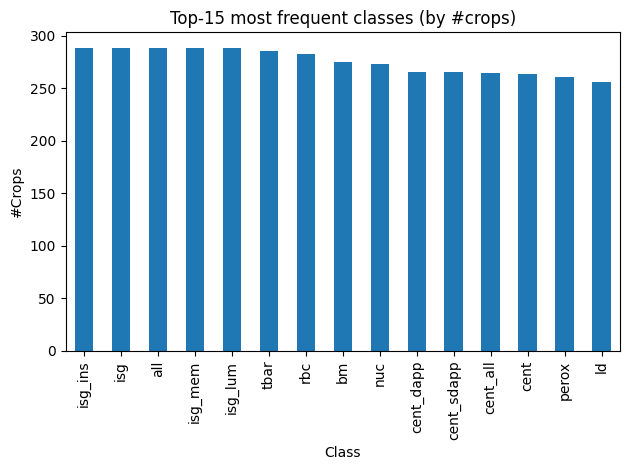

In [15]:
K = 15
topk_classes = class_counts.head(K).index
print(topk_classes)

# 全局Top-K柱状图
ax = class_counts.loc[topk_classes].plot(kind="bar")
ax.set_title(f"Top-{K} most frequent classes (by #crops)")
ax.set_xlabel("Class")
ax.set_ylabel("#Crops")
plt.tight_layout()
plt.show()

<img src="img/7.png" heigth=500 width=700>

In [17]:
class_counts['cyto']

np.int64(238)